# **İLKE** **DERCAN**
# ***20201101004***

# Kütüphanelerin Yüklenmesi

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras.utils import to_categorical
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

#  Veriyi yükleme ve model kurma

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

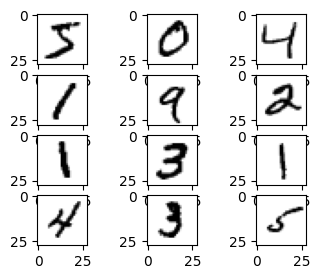

In [ ]:
plt.figure(figsize=(4,3))
for i in range(12):
    plt.subplot(4, 3, i+1)
    plt.grid(False)
    plt.imshow(X_train[i], cmap = plt.cm.binary)
plt.show()

In [ ]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)


In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:

X_train = X_train / 255
X_test = X_test / 255

In [ ]:
input_shape = (28, 28, 1)
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), input_shape = input_shape))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation = 'softmax'))

In [ ]:
model.compile(
    optimizer = 'Adam',
    loss = "categorical_crossentropy",
    metrics = ['accuracy']

)

In [ ]:
history = model.fit(
    X_train,
    y_train,
    verbose = 2,
    epochs = 5,
    batch_size = 16,
    validation_split = 0.2
)

Epoch 1/5
3000/3000 - 49s - loss: 0.3486 - accuracy: 0.8945 - val_loss: 0.1080 - val_accuracy: 0.9699 - 49s/epoch - 16ms/step
Epoch 2/5
3000/3000 - 37s - loss: 0.1740 - accuracy: 0.9473 - val_loss: 0.0863 - val_accuracy: 0.9750 - 37s/epoch - 12ms/step
Epoch 3/5
3000/3000 - 37s - loss: 0.1381 - accuracy: 0.9578 - val_loss: 0.0744 - val_accuracy: 0.9783 - 37s/epoch - 12ms/step
Epoch 4/5
3000/3000 - 38s - loss: 0.1154 - accuracy: 0.9638 - val_loss: 0.0676 - val_accuracy: 0.9808 - 38s/epoch - 13ms/step
Epoch 5/5
3000/3000 - 37s - loss: 0.0982 - accuracy: 0.9681 - val_loss: 0.0698 - val_accuracy: 0.9812 - 37s/epoch - 12ms/step


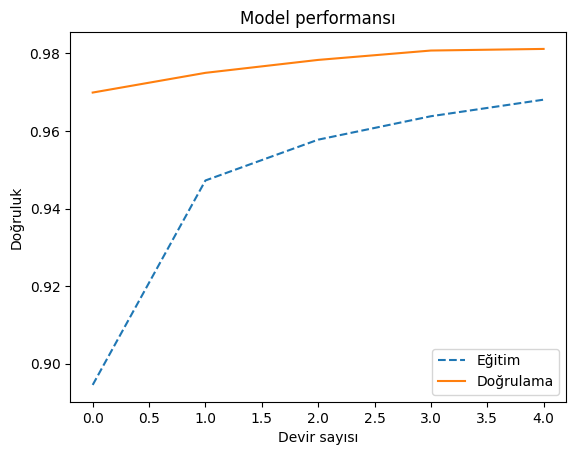

In [ ]:
plt.plot(history.history["accuracy"], '--')
plt.plot(history.history["val_accuracy"])
plt.title("Model performansı")
plt.xlabel("Devir sayısı")
plt.ylabel("Doğruluk")
plt.legend(["Eğitim", "Doğrulama"], loc = 'lower right')
plt.show()

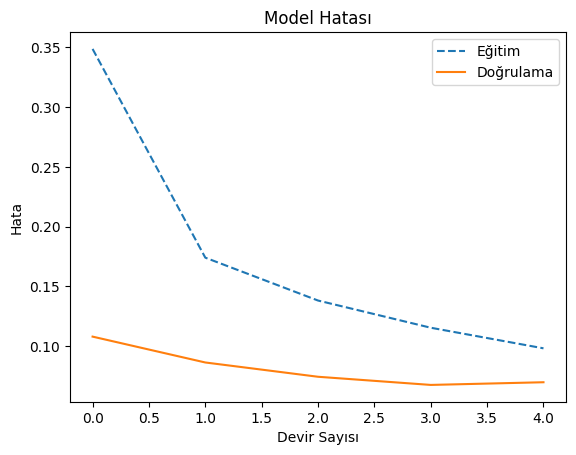

In [ ]:
plt.plot(history.history["loss"], '--')
plt.plot(history.history["val_loss"])
plt.title("Model Hatası")
plt.xlabel("Devir Sayısı")
plt.ylabel("Hata")
plt.legend(["Eğitim", "Doğrulama"], loc = 'upper right')
plt.show()

In [ ]:
performans = model.evaluate(X_test, y_test, verbose = 0)
print("Modelin test performansı: %.2f%%" % (performans[1]*100))

Modelin test performansı: 97.95%


In [ ]:
model.save("model.h5")

# Test Veri Seti Üzerinde Tahmin

In [ ]:
N = 20
X_test_subset = X_test[:N]
y_test_subset = y_test[:N]

predictions = model.predict(X_test_subset)
predicted_labels = np.argmax(predictions, axis=1)

for i in range(N):
    print(f"Tahmin: {predicted_labels[i]}, Gerçek Etiket: {y_test_subset[i]}")

1/1 [==============================] - 0s 160ms/step
Tahmin: 7, Gerçek Etiket: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Tahmin: 2, Gerçek Etiket: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Tahmin: 1, Gerçek Etiket: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Tahmin: 0, Gerçek Etiket: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Tahmin: 4, Gerçek Etiket: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Tahmin: 1, Gerçek Etiket: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Tahmin: 4, Gerçek Etiket: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Tahmin: 9, Gerçek Etiket: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Tahmin: 5, Gerçek Etiket: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Tahmin: 9, Gerçek Etiket: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Tahmin: 0, Gerçek Etiket: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Tahmin: 6, Gerçek Etiket: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Tahmin: 9, Gerçek Etiket: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Tahmin: 0, Gerçek Etiket: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Tahmin: 1, Gerçek Etiket: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Tahmin: 5, Gerçek Etiket: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Tahmin: 9, Gerçek E

312/312 [==============================] - 3s 8ms/step


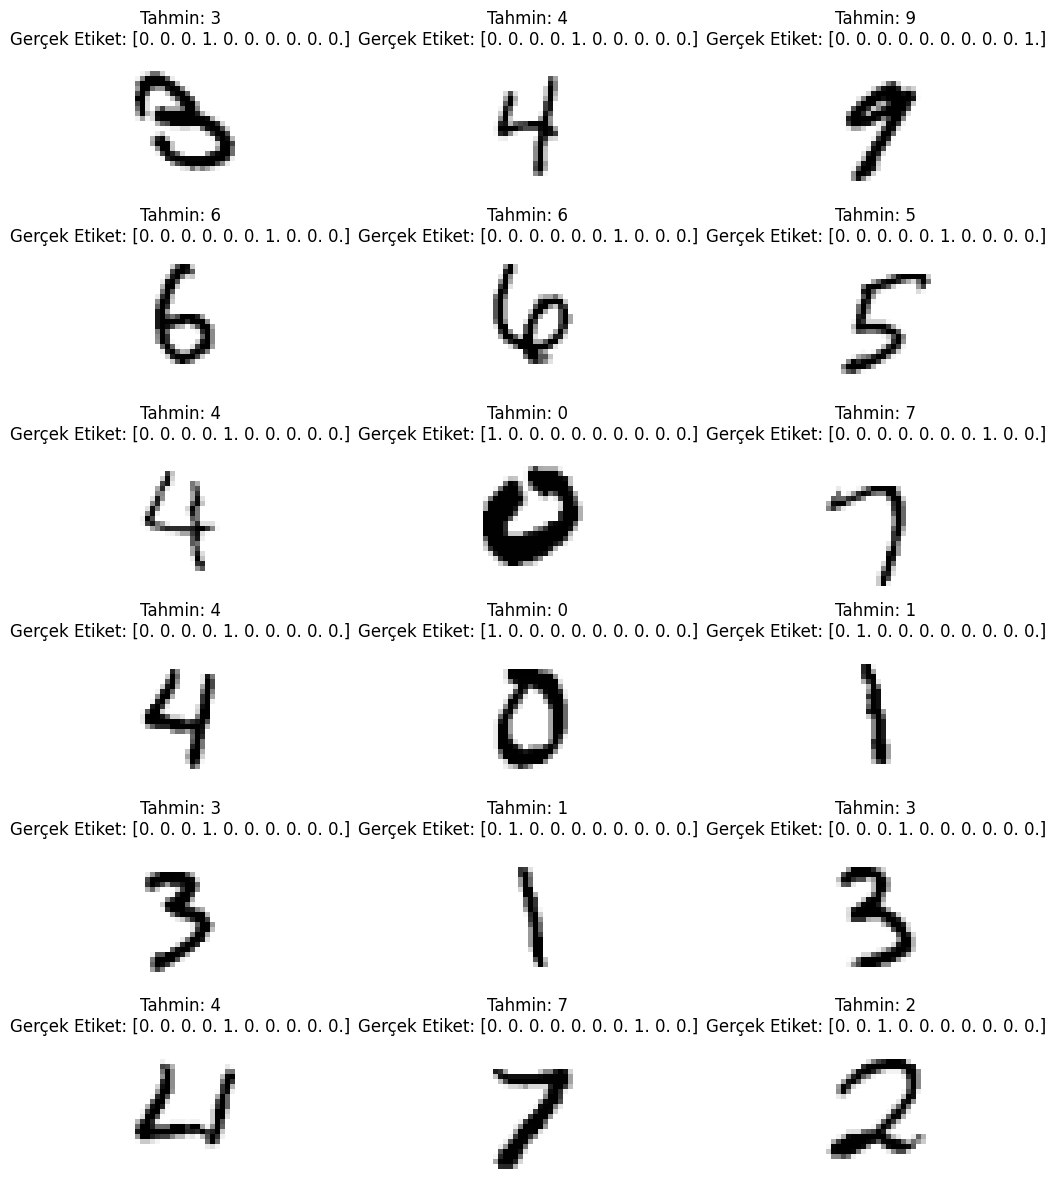

In [ ]:
# Test veri setindeki son 18 örneği tahmin etme
N =18
X_test_subset = X_test[N:]
y_test_subset = y_test[N:]

predictions = model.predict(X_test_subset)
predicted_labels = [np.argmax(prediction) for prediction in predictions]

fig, axes = plt.subplots(N//3, 3, figsize=(12, 12))
for i in range(N):
    row = i // 3
    col = i % 3
    axes[row, col].imshow(X_test_subset[i], cmap=plt.cm.binary)
    axes[row, col].set_title(f"Tahmin: {predicted_labels[i]}\nGerçek Etiket: {y_test_subset[i]}")
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

# Yüklediğim resimler üzerinde tahmin yapma

In [ ]:
from google.colab import files
uploaded = files.upload()
!mkdir resimler
from PIL import Image
import shutil
shutil.move(list(uploaded.keys())[0], 'resimler/')

Saving 4.png to 4.png
Saving 9.png to 9.png
Saving 8.png to 8.png
Saving 3.png to 3.png
Saving 6.png to 6.png
Saving 6e.png to 6e.png
Saving 7.png to 7.png
Saving 8e.png to 8e.png
Saving images.png to images.png
Saving 5.jpeg to 5.jpeg


'resimler/4.png'

In [ ]:

# Resimleri tahmin etme
def predict_image(image_path, model):
    img = Image.open(image_path)
    img = img.resize((28, 28))

    img = img.convert('L')


    img_array = np.array(img)
    img_array = img_array
    img_array = np.expand_dims(img_array, axis=-1)


    prediction = model.predict(np.expand_dims(img_array, axis=0))
    predicted_label = np.argmax(prediction)

    return predicted_label

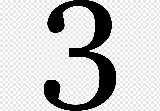

In [ ]:
resim_path = '/content/3.png'
resim = Image.open(resim_path)
resim.thumbnail((160, 160))
resim.show()

In [ ]:
# Yüklenen resimleri tahmin etme
image_path = '/content/3.png'
predicted_label = predict_image(image_path, model)
print(f"Tahmin edilen etiket: {predicted_label}")

1/1 [==============================] - 0s 69ms/step
Tahmin edilen etiket: 8


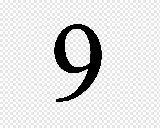

In [ ]:
resim_path = '/content/9.png'
resim = Image.open(resim_path)
resim.thumbnail((160, 160))
resim.show()

In [ ]:
# Yüklenen resimleri tahmin etme
image_path = '/content/9.png'  # Tahmin etmek istediğiniz resmin dosya yolu
predicted_label = predict_image(image_path, model)
print(f"Tahmin edilen etiket: {predicted_label}")

1/1 [==============================] - 0s 23ms/step
Tahmin edilen etiket: 8


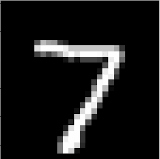

In [ ]:
resim_path = '/content/7.png'
resim = Image.open(resim_path)
resim.thumbnail((160, 160))
resim.show()

In [ ]:
image_path = '/content/7.png'
predicted_label = predict_image(image_path, model)
print(f"Tahmin edilen etiket: {predicted_label}")

1/1 [==============================] - 0s 35ms/step
Tahmin edilen etiket: 7


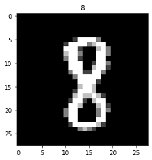

In [ ]:
resim_path = '/content/8e.png'
resim = Image.open(resim_path)
resim.thumbnail((160, 160))
resim.show()

In [ ]:
image_path = '/content/8e.png'
predicted_label = predict_image(image_path, model)
print(f"Tahmin edilen etiket: {predicted_label}")

1/1 [==============================] - 0s 22ms/step
Tahmin edilen etiket: 8
